# Análisis de Mercado: Producción y Venta de Combustibles (YPF, ESSO AXION, SHELL) Por Mes.

### Autor: Renzo Reyna

### https://www.desarrolladorsarmientino.com

#### Fuente de datos: https://datos.gob.ar/

In [256]:
!pip install arch

  Using cached arch-7.0.0-cp310-cp310-win_amd64.whl (925 kB)


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["axes.spines.top"] = True
plt.rcParams["axes.spines.right"] = True
plt.rcParams["axes.spines.bottom"] = True
plt.rcParams["axes.spines.left"] = True
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["lines.markerfacecolor"] = "skyblue"
plt.rcParams["lines.markeredgecolor"] = "skyblue"
plt.rcParams["lines.markersize"] = 6
plt.rcParams["patch.facecolor"] = "skyblue"
plt.rcParams["patch.edgecolor"] = "skyblue"

In [65]:
data_combustibles= pd.read_csv("exportaciones-sector-actividad-saldocomercial-rengo-empresa-exportadora-mensual.csv", sep=",")

In [66]:
df_combustibles= pd.DataFrame(data_combustibles)

df_combustibles.iloc[240:300]

,indice_tiempo,produccion_petroleo_crudo_ypf_sa,produccion_petroleo_crudo_pan_american_energy_llc,produccion_petroleo_crudo_pluspetrol_sa,produccion_petroleo_crudo_sinopec_argentina,produccion_petroleo_crudo_tecpetrol_sa,produccion_petroleo_crudo_total_austral_sa,produccion_petroleo_crudo_chevron_argentina_srl,produccion_petroleo_crudo_enap_sipetrol_argentina_sa,produccion_petroleo_crudo_petrobras_argentina_sa,...,ventas_gasoil_ypf,ventas_gasoil_essoaxion,ventas_gasoil_shell,ventas_gasoil_petrobras,ventas_gasoil_oil,ventas_naftas_ypf,ventas_naftas_essoaxion,ventas_naftas_shell,ventas_naftas_petrobras,ventas_naftas_oil
240,2019-01-01,1161988.92,510389.15,127916.63,98992.87,76400.09,49641.15,27358.44,24662.13,0.00,...,602514.00,177583.00,147795.00,67677.05,0.00,460051.00,113026.00,153170.00,36545.05,0.00
241,2019-02-01,1056728.14,466739.36,113594.95,88211.98,65341.41,38412.26,23868.49,22837.97,0.00,...,584737.00,174289.00,148810.00,61994.56,0.00,424651.00,106592.00,146529.00,35111.86,0.00
242,2019-03-01,1162910.30,516819.65,131024.27,96885.05,71100.29,40521.43,26819.07,27064.63,0.00,...,646377.00,210810.00,160412.00,61747.18,0.00,446361.00,117974.00,154770.00,36954.38,0.00
243,2019-04-01,1129886.64,503186.37,124071.68,93756.30,67222.27,42936.66,26330.95,27974.53,0.00,...,635028.00,198305.00,171724.00,67240.00,0.00,410740.00,109346.00,144651.00,36547.67,0.00
244,2019-05-01,1164091.36,514552.05,129650.36,94875.47,70484.27,46698.82,27037.68,29500.22,0.00,...,647402.00,201999.00,163708.00,62990.33,0.00,421253.00,115765.00,152704.00,31225.21,0.00
245,2019-06-01,1104905.97,499335.68,125775.96,91096.70,64777.81,44958.23,24673.73,30094.73,0.00,...,591846.00,185156.00,153045.00,77488.30,0.00,393893.00,108981.00,142040.00,33050.58,0.00
246,2019-07-01,1158714.13,508675.54,126678.33,96771.62,70037.37,49309.32,27077.75,30779.43,0.00,...,645362.00,213047.00,177458.00,83217.32,0.00,429720.00,119298.00,163109.00,37782.10,0.00
247,2019-08-01,1183217.21,520971.79,126620.02,94598.86,72543.53,50829.55,27119.85,30364.03,0.00,...,655666.00,207292.00,169697.00,79639.63,0.00,424457.00,117465.00,160899.00,38708.06,0.00
248,2019-09-01,1137765.28,505600.38,127923.33,90467.66,71782.20,49372.72,25892.32,28576.65,0.00,...,612193.00,169349.00,163393.00,72053.38,0.00,402673.00,107594.00,154718.00,38411.11,0.00
249,2019-10-01,1168835.52,530432.71,138893.73,92704.16,73057.40,50132.87,26961.22,27993.43,0.00,...,643630.00,175279.00,174174.00,75332.27,0.00,430700.00,114087.00,172872.00,43051.72,0.00


In [67]:
# Cambiar formatos núimericos a Números con dos decimales
pd.options.display.float_format = '{:.2f}'.format

In [68]:
df_combustibles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 29 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   indice_tiempo                                         303 non-null    object 
 1   produccion_petroleo_crudo_ypf_sa                      303 non-null    float64
 2   produccion_petroleo_crudo_pan_american_energy_llc     303 non-null    float64
 3   produccion_petroleo_crudo_pluspetrol_sa               303 non-null    float64
 4   produccion_petroleo_crudo_sinopec_argentina           211 non-null    float64
 5   produccion_petroleo_crudo_tecpetrol_sa                303 non-null    float64
 6   produccion_petroleo_crudo_total_austral_sa            303 non-null    float64
 7   produccion_petroleo_crudo_chevron_argentina_srl       289 non-null    float64
 8   produccion_petroleo_crudo_enap_sipetrol_argentina_sa  213 no

In [69]:
df_combustibles.describe()

,produccion_petroleo_crudo_ypf_sa,produccion_petroleo_crudo_pan_american_energy_llc,produccion_petroleo_crudo_pluspetrol_sa,produccion_petroleo_crudo_sinopec_argentina,produccion_petroleo_crudo_tecpetrol_sa,produccion_petroleo_crudo_total_austral_sa,produccion_petroleo_crudo_chevron_argentina_srl,produccion_petroleo_crudo_enap_sipetrol_argentina_sa,produccion_petroleo_crudo_petrobras_argentina_sa,produccion_gas_natural_ypf_sa,...,ventas_gasoil_ypf,ventas_gasoil_essoaxion,ventas_gasoil_shell,ventas_gasoil_petrobras,ventas_gasoil_oil,ventas_naftas_ypf,ventas_naftas_essoaxion,ventas_naftas_shell,ventas_naftas_petrobras,ventas_naftas_oil
count,303.00,303.00,303.00,211.00,303.00,303.00,289.00,213.00,250.00,303.00,...,303.00,303.00,303.00,222.00,155.00,303.00,303.00,303.00,222.00,155.00
mean,1215900.22,470211.06,111317.29,126702.31,112002.56,89102.88,164299.26,36403.17,137212.60,1123031.15,...,596761.42,156098.69,155038.77,92902.00,28877.32,294723.79,78375.02,110673.80,43486.80,12402.02
std,235397.35,80025.61,44691.97,58560.66,37772.39,57744.82,124682.38,13835.30,120771.28,205626.45,...,97504.25,26963.37,19924.90,35754.75,27599.91,120420.56,27783.71,43299.30,9629.29,11837.96
min,701997.99,34771.25,47194.28,0.00,33264.01,27534.98,3962.80,8606.65,0.00,171995.23,...,367559.00,82661.00,96176.00,46848.23,0.00,114983.00,36464.00,47132.00,17055.92,0.00
25%,1046055.68,466308.64,70139.52,88281.73,73461.86,44852.83,32994.27,26046.74,0.00,995551.20,...,505006.00,136637.65,142353.00,66462.79,0.00,172058.50,52660.85,76365.50,36857.14,0.00
50%,1145321.41,495606.96,113594.95,135313.27,112675.81,61711.84,147411.40,36469.19,161008.82,1116225.55,...,630530.00,158579.00,152483.00,78055.49,45425.23,297269.00,73776.00,102914.00,40792.28,19585.71
75%,1378327.44,515606.25,145017.13,178807.88,149541.85,129068.37,266926.20,46833.92,222376.20,1239201.15,...,667169.00,176977.12,166420.50,114570.59,54857.66,402691.50,105105.00,145590.00,51486.00,23455.40
max,1845878.00,567877.41,193858.49,226473.32,172090.56,275314.59,412070.00,67381.54,382709.73,2337017.84,...,792651.00,214049.00,209435.00,180516.00,66239.36,533262.00,135845.00,208658.00,69509.75,29862.43


In [70]:
print(f'Número de filas con valores perdidos: {np.mean(df_combustibles.isnull().any(axis=0))}')

print(f'Total de valores nulos: {np.sum(df_combustibles.isnull())}')

print(f'Total de valores repetidos: {np.sum(df_combustibles.duplicated())}')

Número de filas con valores perdidos: 0.41379310344827586
Total de valores nulos: indice_tiempo                                             0
produccion_petroleo_crudo_ypf_sa                          0
produccion_petroleo_crudo_pan_american_energy_llc         0
produccion_petroleo_crudo_pluspetrol_sa                   0
produccion_petroleo_crudo_sinopec_argentina              92
produccion_petroleo_crudo_tecpetrol_sa                    0
produccion_petroleo_crudo_total_austral_sa                0
produccion_petroleo_crudo_chevron_argentina_srl          14
produccion_petroleo_crudo_enap_sipetrol_argentina_sa     90
produccion_petroleo_crudo_petrobras_argentina_sa         53
produccion_gas_natural_ypf_sa                             0
produccion_gas_natural_pan_american_energy_llc            0
produccion_gas_natural_pluspetrol_sa                      0
produccion_gas_natural_sinopec_argentina_exploration      0
produccion_gas_natural_tecpetrol_sa                      52
produccion_gas_nat

In [84]:
select_column_nafta= df_combustibles[['indice_tiempo','ventas_naftas_ypf']]

df_ventas_nafta= pd.DataFrame(select_column_nafta)

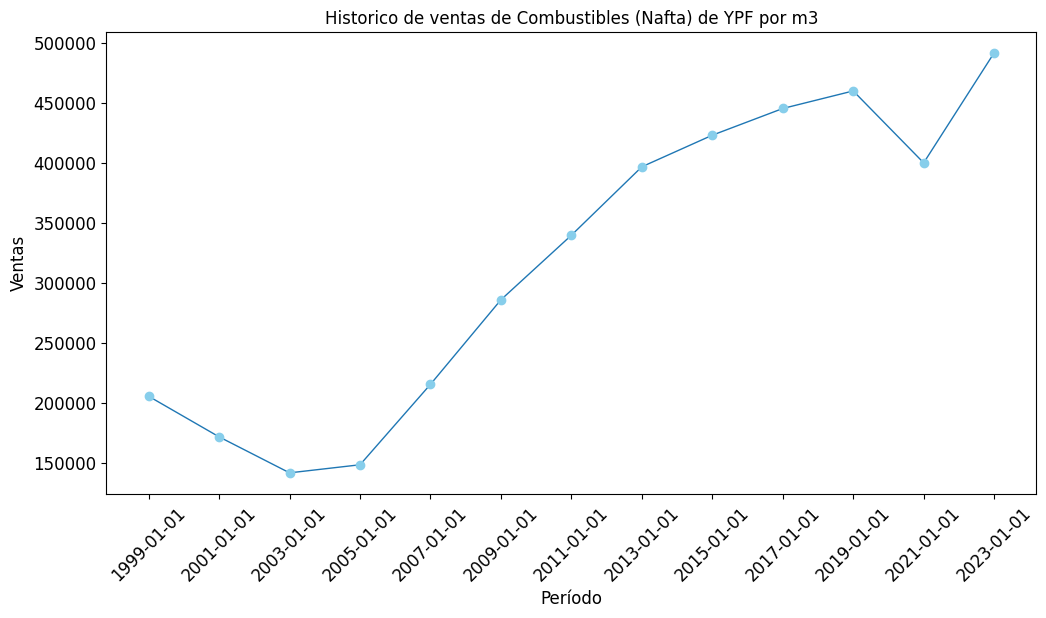

In [175]:
plt.plot(df_ventas_nafta['indice_tiempo'].iloc[0::24], df_ventas_nafta['ventas_naftas_ypf'].iloc[0::24],
        marker='o')
plt.title('Historico de ventas de Combustibles (Nafta) de YPF por m3')
plt.xlabel('Período')
plt.ylabel('Ventas')
plt.tick_params(axis='x', rotation=45)
plt.show()

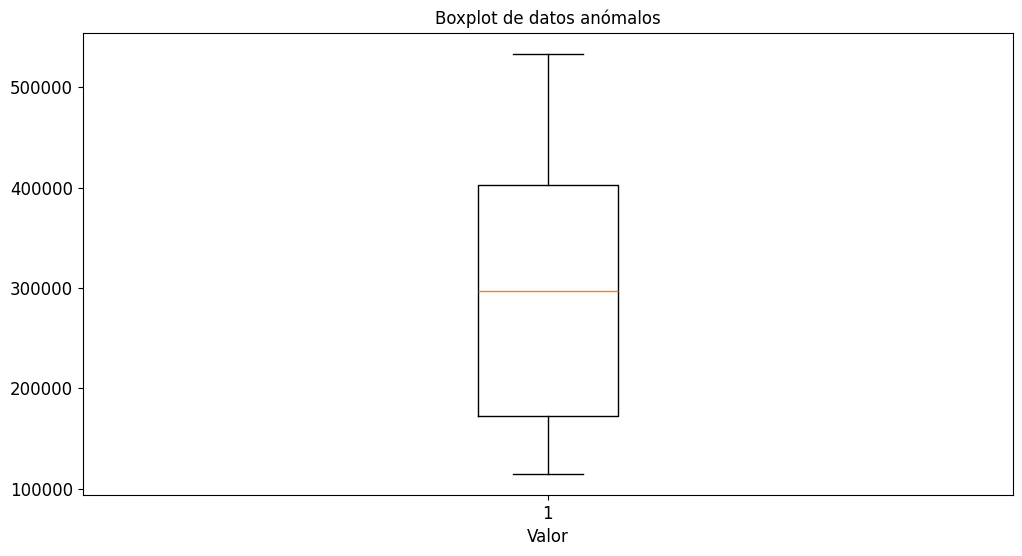

In [164]:
plt.boxplot(df_ventas_nafta['ventas_naftas_ypf'], vert=True)
plt.xlabel('Valor')
plt.title('Boxplot de datos anómalos')
plt.show()

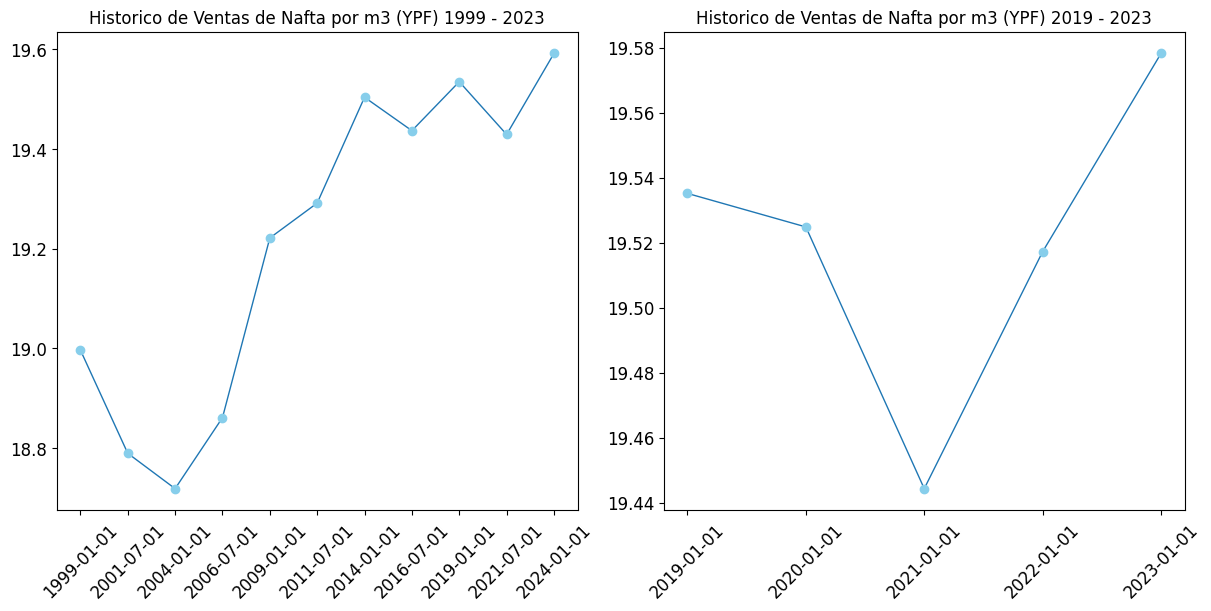

	Promedio de ventas de Nafta por m3 entre 1999 - 2023: 19.171161333943203 m3

	Promedio de ventas de Nafta por m3 entre 2019 - 2023: 19.51991960551599 m3


In [246]:
fig, ax= plt.subplots(ncols=2, nrows=1, figsize=(12, 6), layout='constrained')

ax[0].set_title('Historico de Ventas de Nafta por m3 (YPF) 1999 - 2023')
ax[0].plot(df_ventas_gasoil['indice_tiempo'].iloc[0::30], 
        df_ventas_nafta['ventas_naftas_ypf'].iloc[0::30], marker='o', label=' Volumen de Ventas de Nafta por m3')
ax[0].tick_params(axis='x', rotation=45)


ax[1].set_title('Historico de Ventas de Nafta por m3 (YPF) 2019 - 2023')
ax[1].plot(df_ventas_gasoil['indice_tiempo'].iloc[240:300:12], 
        df_ventas_nafta['ventas_naftas_ypf'].iloc[240:300:12], marker='o', label=' Volumen de Ventas de Gasoil por m3')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

print('\tPromedio de ventas de Nafta por m3 entre 1999 - 2023:', 
      np.mean(df_ventas_nafta['ventas_naftas_ypf']), 'm3\n')

print('\tPromedio de ventas de Nafta por m3 entre 2019 - 2023:', 
      np.mean(df_ventas_nafta['ventas_naftas_ypf'].iloc[240:300:12]), 'm3')

In [248]:
df_ventas_nafta.to_csv('df_ventas_nafta.csv')

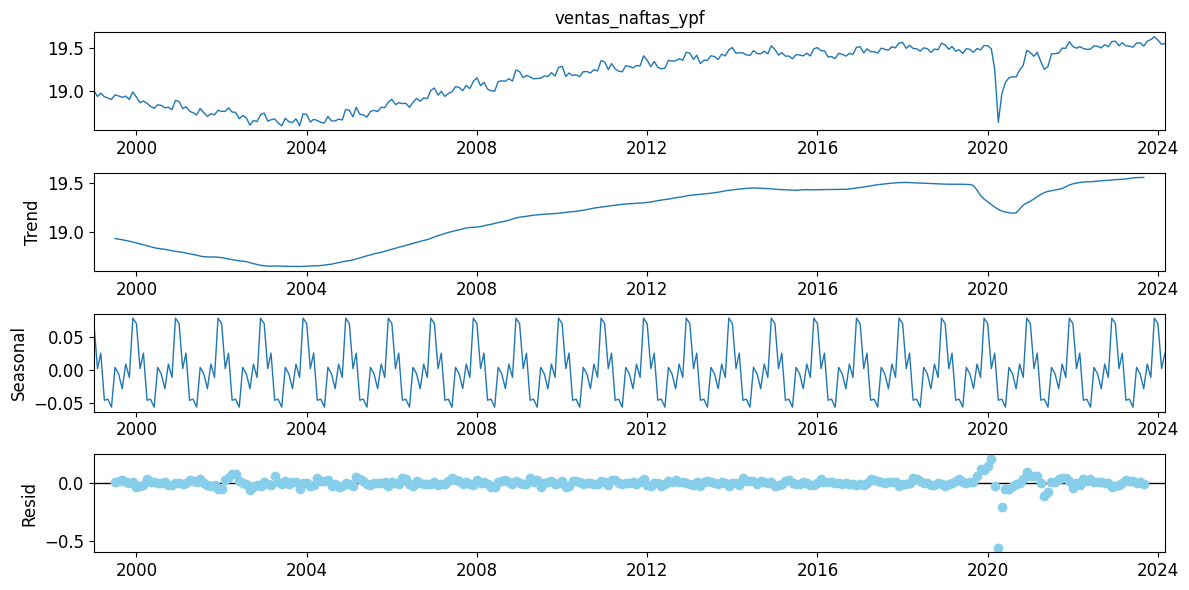

In [249]:
serie_ypf= pd.read_csv('df_ventas_nafta.csv', parse_dates=['indice_tiempo'], index_col='indice_tiempo')

serie_ypf= pd.DataFrame(serie_ypf)

result = seasonal_decompose(serie_ypf['ventas_naftas_ypf'], model='additive', period=12)
result.plot()
plt.show()

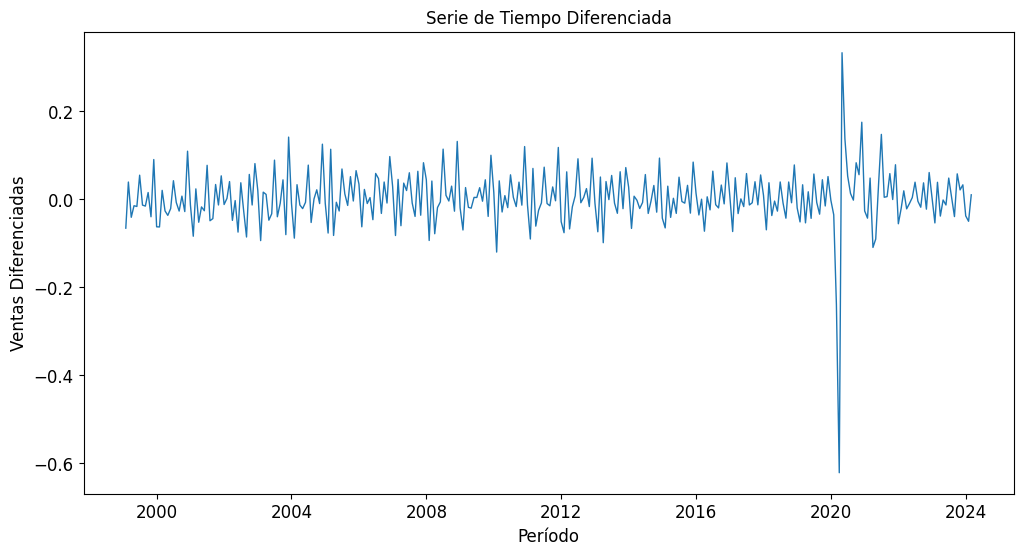

In [250]:
# Diferenciar la serie para hacerla estacionaria
serie_ypf= serie_ypf['ventas_naftas_ypf'].diff().dropna()

# Graficar la serie diferenciada
plt.plot(serie_ypf)
plt.title('Serie de Tiempo Diferenciada')
plt.xlabel('Período')
plt.ylabel('Ventas Diferenciadas')
plt.show()

In [251]:
print('Valores nulos existentes:', np.sum(serie_ypf.isna()))

print('Valores infinitos existentes:', np.isinf(serie_ypf))

Valores nulos existentes: 0
Valores infinitos existentes: indice_tiempo
1999-02-01    False
1999-03-01    False
1999-04-01    False
1999-05-01    False
1999-06-01    False
              ...  
2023-11-01    False
2023-12-01    False
2024-01-01    False
2024-02-01    False
2024-03-01    False
Name: ventas_naftas_ypf, Length: 302, dtype: bool


In [252]:
# Prueba de Dickey-Fuller en la serie original
result_diff= adfuller(serie_ypf)
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
print('Critical Values:', result_diff[4])

# Interpretación
if result_diff[1] < 0.05:
    print("Rechazamos la hipótesis nula: La serie diferenciada es estacionaria")
else:
    print("No podemos rechazar la hipótesis nula: La serie diferenciada no es estacionaria")

ADF Statistic: -4.112341260502404
p-value: 0.0009240187073038272
Critical Values: {'1%': -3.453261605529366, '5%': -2.87162848654246, '10%': -2.5721455328896603}
Rechazamos la hipótesis nula: La serie diferenciada es estacionaria


In [234]:
df_ventas_nafta['ventas_naftas_ypf']= np.log(df_ventas_nafta['ventas_naftas_ypf'])

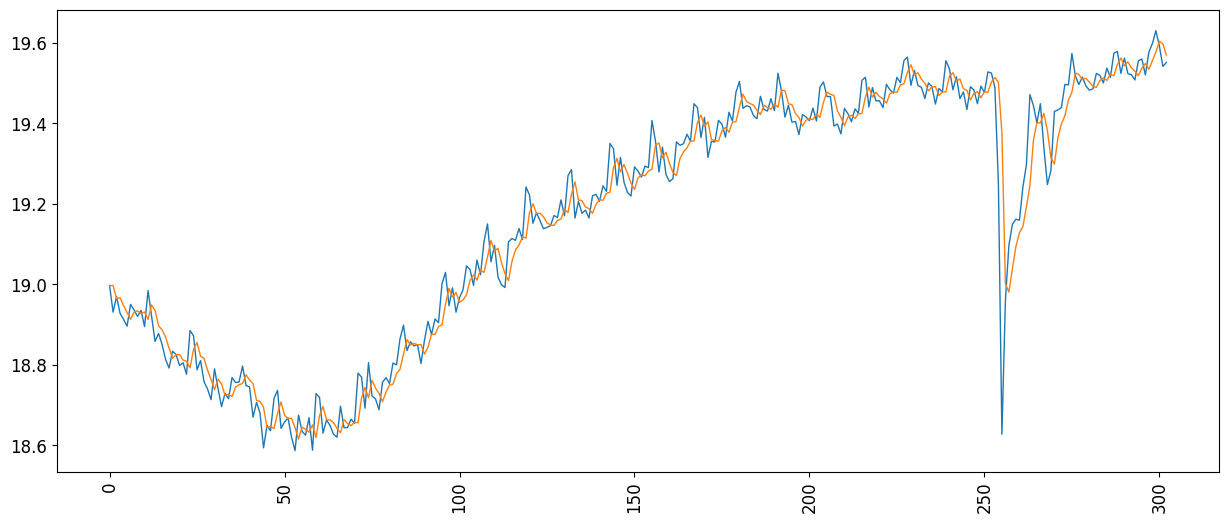

In [235]:
# Aplicar suavizado exponencial simple
alpha = 0.5
smoothed= [df_ventas_nafta['ventas_naftas_ypf'][0]]
for t in range(1, len(df_ventas_nafta['ventas_naftas_ypf'])):
    smoothed.append(alpha * df_ventas_nafta['ventas_naftas_ypf'][t-1] + (1 - alpha) * smoothed[t-1])

# Plotear la serie original y la suavizada
fig, ax= plt.subplots(figsize=(15, 6))
ax.plot(df_ventas_nafta['ventas_naftas_ypf'])
ax.plot(smoothed)
ax.tick_params(axis='x', rotation=90)
plt.show()

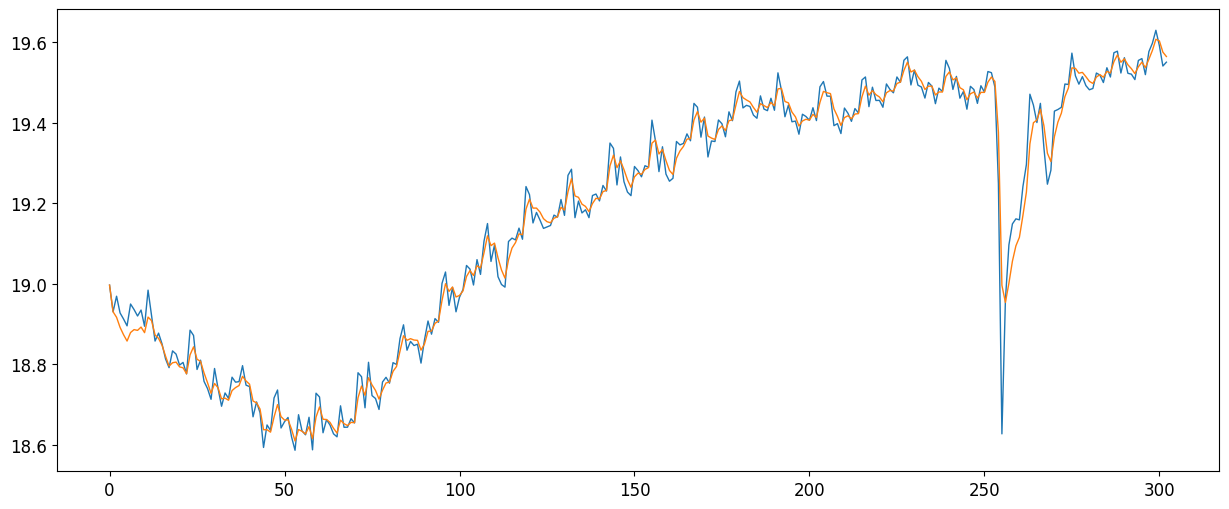

In [236]:
# Aplicar suavizado exponencial doble
alpha = 0.5
beta = 0.1
smoothed = [df_ventas_nafta['ventas_naftas_ypf'][0]]
trend = [df_ventas_nafta['ventas_naftas_ypf'][1] - df_ventas_nafta['ventas_naftas_ypf'][0]]
for t in range(1, len(df_ventas_nafta['ventas_naftas_ypf'])):
    smoothed.append(alpha * df_ventas_nafta['ventas_naftas_ypf'][t] + (1 - alpha) * (smoothed[t-1] + trend[t-1]))
    trend.append(beta * (smoothed[t] - smoothed[t-1]) + (1 - beta) * trend[t-1])

# Plotear la serie original y la suavizada
fig, ax= plt.subplots(figsize=(15, 6))
ax.plot(df_ventas_nafta['ventas_naftas_ypf'])
ax.plot(smoothed)
plt.show()

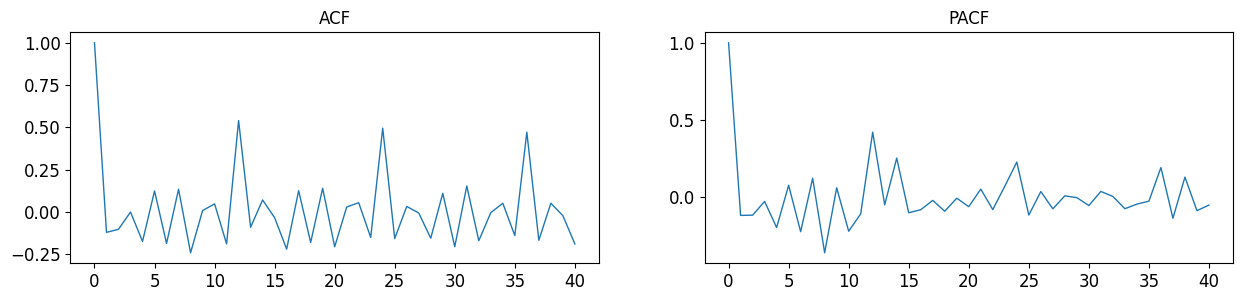

In [237]:
# Visualización de ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].plot(acf(serie_ypf.dropna(), nlags=40))
axes[0].set_title('ACF')
axes[1].plot(pacf(serie_ypf.dropna(), nlags=40))
axes[1].set_title('PACF')
plt.show()

In [238]:
model_1= ARIMA(df_ventas_nafta['ventas_naftas_ypf'], order=(0,1,1))
model_1_fit= model_1.fit()

print(model_1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      ventas_naftas_ypf   No. Observations:                  303
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 397.298
Date:                Sat, 13 Jul 2024   AIC                           -790.596
Time:                        19:43:39   BIC                           -783.175
Sample:                             0   HQIC                          -787.627
                                - 303                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2337      0.029     -8.106      0.000      -0.290      -0.177
sigma2         0.0042      0.000     37.039      0.000       0.004       0.004
Ljung-Box (L1) (Q):                   0.31   Jarque-

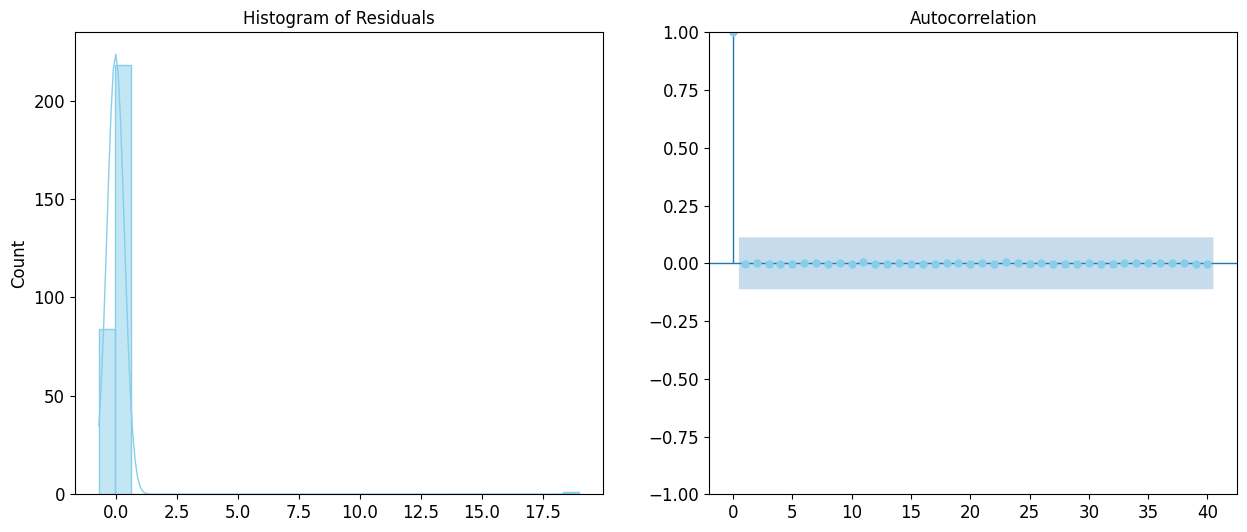

In [244]:
# Ploteo de residuos
residuals = model_1_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(residuals, bins=30, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Residuals')
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[1])
plt.show()

In [204]:
# Diagnóstico del modelo
# model_fit.plot_diagnostics(figsize=(15, 9))
# plt.show()


In [240]:
model_2= ARIMA(df_ventas_nafta['ventas_naftas_ypf'], order=(1,1,0))
model_2_fit= model_1.fit()

print(model_2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      ventas_naftas_ypf   No. Observations:                  303
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 397.298
Date:                Sat, 13 Jul 2024   AIC                           -790.596
Time:                        19:44:03   BIC                           -783.175
Sample:                             0   HQIC                          -787.627
                                - 303                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2337      0.029     -8.106      0.000      -0.290      -0.177
sigma2         0.0042      0.000     37.039      0.000       0.004       0.004
Ljung-Box (L1) (Q):                   0.31   Jarque-

In [241]:
model_3= ARIMA(df_ventas_nafta['ventas_naftas_ypf'], order=(1,1,1))
model_3_fit= model_1.fit()

print(model_3_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      ventas_naftas_ypf   No. Observations:                  303
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 397.298
Date:                Sat, 13 Jul 2024   AIC                           -790.596
Time:                        19:44:24   BIC                           -783.175
Sample:                             0   HQIC                          -787.627
                                - 303                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2337      0.029     -8.106      0.000      -0.290      -0.177
sigma2         0.0042      0.000     37.039      0.000       0.004       0.004
Ljung-Box (L1) (Q):                   0.31   Jarque-

                               SARIMAX Results                                
Dep. Variable:      ventas_naftas_ypf   No. Observations:                  303
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 397.882
Date:                Sat, 13 Jul 2024   AIC                           -789.763
Time:                        19:44:58   BIC                           -778.632
Sample:                             0   HQIC                          -785.310
                                - 303                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
covid_impact    -0.0551      0.103     -0.534      0.593      -0.257       0.147
ma.L1           -0.2298      0.028     -8.104      0.000      -0.285      -0.174
sigma2           0.0042      0.000     37.43

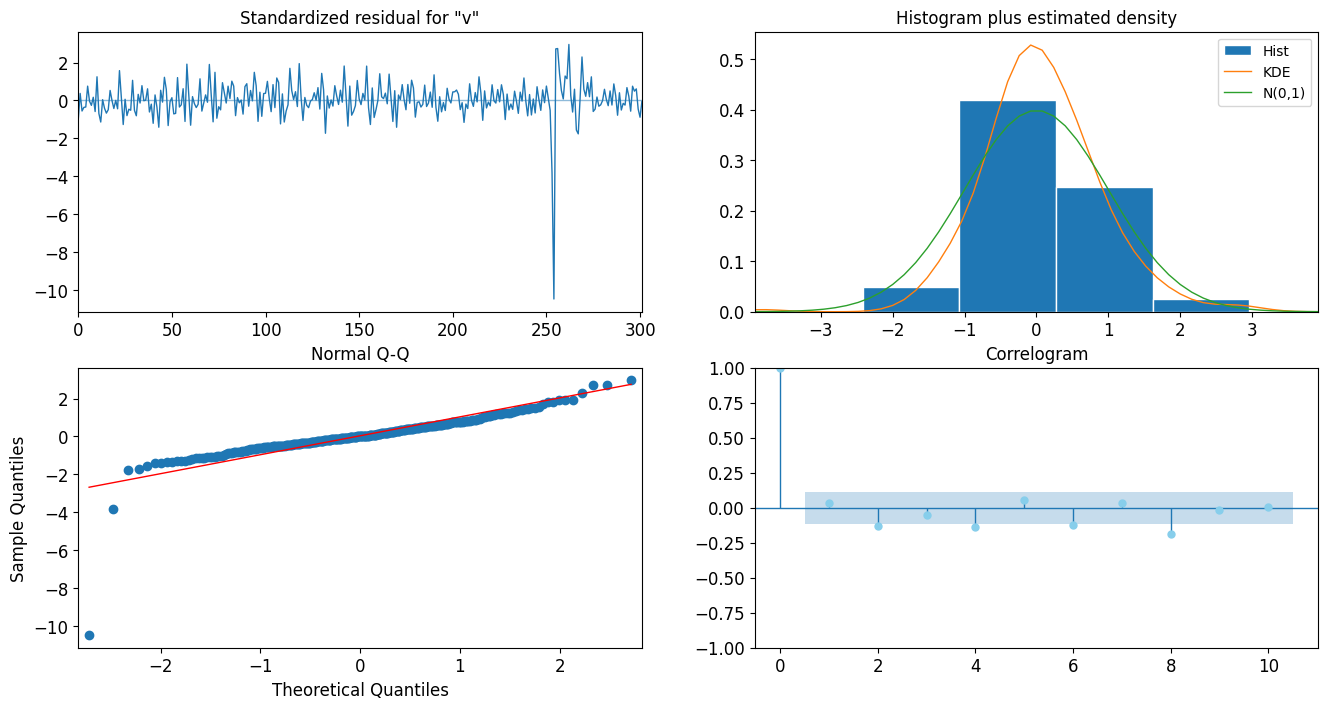

In [242]:
# Creación de una variable exógena para capturar el impacto de la pandemia
df_ventas_nafta['covid_impact'] = 0
df_ventas_nafta.loc['2019-01-01':'2021-12-31', 'covid_impact'] = 1

# Ajuste del modelo SARIMAX
model = SARIMAX(df_ventas_nafta['ventas_naftas_ypf'], 
                order=(0, 1, 1), 
                exog=df_ventas_nafta['covid_impact'])
result = model.fit()

# Resultados del modelo
print(result.summary())

# Diagnóstico del modelo
result.plot_diagnostics(figsize=(16, 8))
plt.show()

In [253]:
from scipy.stats import boxcox

# Aplicar transformación de Box-Cox
df_ventas_nafta['ventas_boxcox'], lambda_value = boxcox(df_ventas_nafta['ventas_naftas_ypf'])

# Lambda óptimo encontrado por la función boxcox
print(f'Lambda óptimo: {lambda_value}')


Lambda óptimo: 19.71881202903216


In [257]:
from arch import arch_model

# Ajustar un modelo GARCH(1,1)
model = arch_model(df_ventas_nafta['ventas_naftas_ypf'], vol='Garch', p=1, q=1)
model_fit = model.fit()

# Mostrar el resumen del modelo
print(model_fit.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 9960198297.486176
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3303601.917612426
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2197910041.736578
Iteration:      4,   Func. Count:     30,   Neg. LLF: 408.2038996064043
Iteration:      5,   Func. Count:     37,   Neg. LLF: 404.77268800144003
Iteration:      6,   Func. Count:     43,   Neg. LLF: 3.243208499328148
Iteration:      7,   Func. Count:     49,   Neg. LLF: 47.648694536844815
Iteration:      8,   Func. Count:     55,   Neg. LLF: -55.290757123967154
Iteration:      9,   Func. Count:     60,   Neg. LLF: -32.92975805595647
Iteration:     10,   Func. Count:     66,   Neg. LLF: -54.39934034774964
Iteration:     11,   Func. Count:     72,   Neg. LLF: -47.63829215079163
Iteration:     12,   Func. Count:     78,   Neg. LLF: -59.79937394155063
Iteration:     13,   Func. Count:     84,   Neg. LLF: -59.776593285783974
Iteration:     14,   Func. Count:     90,   Neg. LLF: 